# Мобильные приложения — Выделение групп пользователей на основе поведения

**Целью** работы является изучение аудитории мобильного приложения по продаже личных вещей путем сегментирования пользователей на основании совершаемых ими действий. 

В **задачи** работы входят:
 - проведение исследовательского анализа данных
 - сегментирование пользователей
 - проверка статистических гипотез

По результатам выполнения работы необходимо составить портрет пользователя каждой группы.

Работа разделена на следующие части:
#### Часть 1. Изучение данных  
* [1.1 Изучение файлов с данными, загрузка библиотек](#section1-1)
#### Часть 2. Предобработка данных
* [2.1 Получение общей информации о данных, изучение количества пропусков и дубликатов](#section2-1)
* [2.2 Приведение названий столбцов к удобному виду](#section2-2)
* [2.3 Поиск и устранение неявных дубликатов](#section2-3)
* [2.4 Приведение данных к нужным типам](#section2-4)
#### Часть 3. Исследовательский анализ данных
* [3.1 Создание пользовательских профилей](#section3-1)
* [3.2 Изучение распределения пользователей по источникам установки приложения](#section3-2)
* [3.3 Распределение количества целевых действий по источникам установки приложения?](#section3-3)
* [3.4 Сколько в среднем действий совершает пользователь за весь рассматриваемый период?](#section3-4)
* [3.5 Анализ действий пользователей, совершающих минимальное и максимальное количество действий в приложении](#section3-5)
* [3.6 Определение самого популярного действия](#section3-6)
* [3.7 Сколько раз было выполнено целевое действие - просмотр карточки контактов?](#section3-7)
* [3.8 Сколько уникальных пользователей выполнили целевое действие? Сколько раз целевое действие выполянется пользователями?](#section3-8)
* [3.9 Анализ действий пользователей во времени. Определение количества всех действий/целевого действия в день/неделю/месяц. Количество целевых действий на пользователя в разрезе по времени](#section3-9)
* [3.10 Определение длительности сессий пользователей](#section3-10)
* [3.11 Определение характерных признаков для сегментирования](#section3-11)
#### Часть 4. Сегментирование пользователей на основе действий
* [4.1 Изучение средних значений признаков](#section4-1)
* [4.2 Построение матрицы корреляций и её отображение](#section4-2)
* [4.3 Построение дендрограммы. Определение количества кластеров](#section4-3)
* [4.4 Обучение модели кластеризации, прогнозирование кластеров пользователей](#section4-4)
* [4.5 Изучение средних значений признаков для кластеров](#section4-5)
* [4.6 Изучение различий между кластерами](#section4-6)
* [4.7 Сравнение признаков для кластеров (построение графиков)](#section4-7)
#### Часть 5. Определение пользовательских метрик для кластеров
* [5.1 Определение retention rate](#section5-1)
* [5.2 Определение времени, проведенного в приложении](#section5-2)
* [5.3 Определение конверсии](#section5-3)
#### Часть 6. Проверка гипотез
* [6.1 Гипотеза: Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Две эти группы демонстрируют разную конверсию в просмотры контактов](#section6-1)
* [6.2 Гипотеза: Retention rate отличается для пользователей из разных кластеров](#section6-2)
#### Часть 7. Выводы и рекомендации

## Часть 1. Изучение данных 

<a id='section1-1'></a>
### 1.1 Изучение файлов с данными, загрузка библиотек

Импортируем нужные библиотеки и их модули.

In [1]:
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score
from datetime import datetime, timedelta
from scipy import stats as st

Прочитаем файлы файлы с данными о событиях, совершенных пользователями и источниках, с которых пользователи установили приложение. Сохраним их в переменные events и sources, соответственно.

In [2]:
filename_events = os.path.join(os.sep, os.getcwd(), 'datasets', 'mobile_dataset.csv')
filename_sources = os.path.join(os.sep, os.getcwd(), 'datasets', 'mobile_sources.csv')
    
events = pd.read_csv(filename_events)
sources = pd.read_csv(filename_sources)

Изучим первые пять строк датасетов events и sources.

In [3]:
display(events.head())
sources.head()

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


## Часть 2. Предобработка данных

<a id='section2-1'></a>
### 2.1 Получение общей информации о данных, изучение количества пропусков и дубликатов

Для получения общей информации о данных и вывода количества пропусков создадим функцию data_info():

In [4]:
def data_info(df):
    display(df.info())
    print('Количество дубликатов:', df.duplicated().sum(), '\n')
    print('Количество пропусков:', df[df.isna()].count())
    return

Применим data_info() к events и sources.

In [5]:
data_info(events)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


None

Количество дубликатов: 0 

Количество пропусков: event.time    0
event.name    0
user.id       0
dtype: int64


In [6]:
data_info(sources)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


None

Количество дубликатов: 0 

Количество пропусков: userId    0
source    0
dtype: int64


Пропуски и явные дубликаты в данных отсутствуют. Далее приведем названия столбцов к удобному виду и поищем неявные дубликаты.

<a id='section2-2'></a>
### 2.2 Приведение названий столбцов к удобному виду

В датафрейме events заменим точки в названиях столбцов на нижнее подчеркивание. В sources вручную переименуем столбец userId.

In [7]:
events.columns = [x.replace('.', '_') for x in events.columns]
sources.rename(columns={'userId':'user_id'}, inplace=True)

<a id='section2-3'></a>
### 2.3 Поиск и устранение неявных дубликатов

Для начала изучим уникальные значения столбца event_name датафрейма events.

In [8]:
events['event_name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7', 'show_contacts'], dtype=object)

События contacts_show и show_contacts объединим в одно и назовем его contacts_show.

In [9]:
events['event_name'] = events['event_name'].replace('show_contacts', 'contacts_show')

В sources проверим уникальные значения столбца source.

In [10]:
sources['source'].unique()

array(['other', 'yandex', 'google'], dtype=object)

<a id='section2-5'></a>
### 2.5 Приведение данных к нужным типам

Столбец event_time датафрейма events приведем к типу datetime.

In [11]:
events['event_time'] = pd.to_datetime(events['event_time'], format = '%Y-%m-%d %H:%M:%S')

In [12]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


## Часть 3. Исследовательский анализ данных

<a id='section3-1'></a>
### 3.1 Создание пользовательских профилей

Изучим минимальное и максимальное время совершения действия в приложении. 

In [13]:
print('Минимальная дата и время:', events['event_time'].min(),
      '\n'
      'Максимальная дата и время:', events['event_time'].max())

Минимальная дата и время: 2019-10-07 00:00:00.431357 
Максимальная дата и время: 2019-11-03 23:58:12.532487


В датасете записи о действиях пользователей за 27 дней.  

В отдельный столбец выделим дату совершения действия. Также изменим порядок столбцов в events на более удобный.

In [14]:
events['event_date'] = events['event_time'].dt.date
events = events.reindex(columns=['user_id', 'event_time', 'event_date', 'event_name'])

Сгруппируем таблицу events по user_id и добавим источник установки установки приложения из таблицы sources.

In [15]:
users = events.sort_values(by=['user_id', 'event_time']).merge(sources, how='left', on='user_id')
users.head()

,user_id,event_time,event_date,event_name,source
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,2019-10-07,tips_show,other
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:40:31.052909,2019-10-07,tips_show,other
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:41:05.722489,2019-10-07,tips_show,other
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:43:20.735461,2019-10-07,tips_show,other
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:45:30.917502,2019-10-07,tips_show,other


<a id='section3-2'></a>
### 3.2 Изучение распределения пользователей по источникам установки приложения

Посмотрим с какого источника пришло больше всего пользователей.

In [16]:
users.groupby('source').agg({'user_id':'nunique'}).reset_index().sort_values(by='user_id', ascending=False)

,source,user_id
2,yandex,1934
1,other,1230
0,google,1129


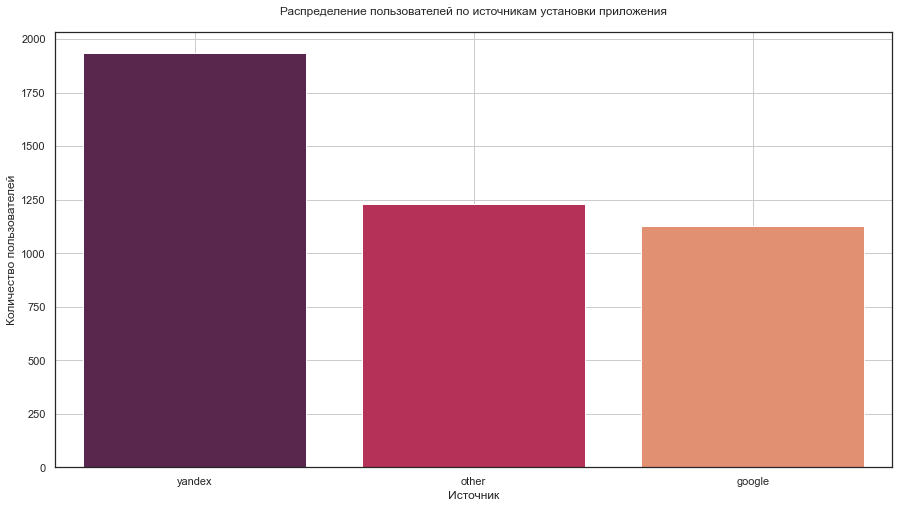

In [17]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style('white')

sns.barplot(data=users.groupby('source').agg({'user_id':'nunique'}).reset_index().sort_values(by='user_id', ascending=False), 
            x='source', y='user_id', palette='rocket')

plt.grid()
plt.title('Распределение пользователей по источникам установки приложения'+ "\n")
plt.xlabel('Источник')
plt.ylabel('Количество пользователей');

**Вывод**: Больше всего пользователей (1934) установили приложение с источника yandex. На втором месте органические пользователи - 1230 человек, они сами скачали приложение, не пользуясь ссылкамим yandex и google (в контексте данной задачи можно источник other отнести к типу organic). На третьем месте источник google - 1129 пользователей.

<a id='section3-3'></a>
### 3.3 Распределение количества целевых действий по источникам установки приложения

Посмотрим с какого источника пользователи выполнили больше целевых действий (contacts_show).

In [18]:
(users[users['event_name'] == 'contacts_show'].groupby('source')['event_name'].count().reset_index()
                                              .sort_values(by='event_name', ascending=False))

,source,event_name
2,yandex,2035
0,google,1440
1,other,1054


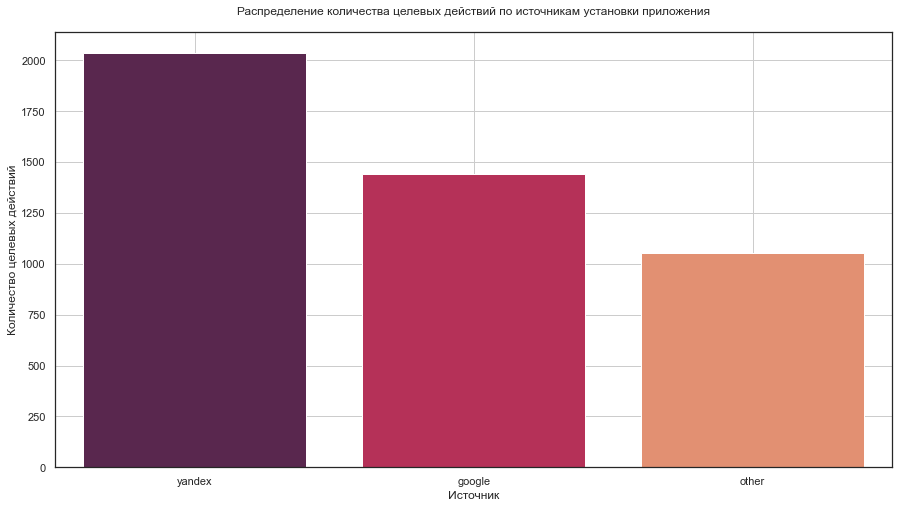

In [19]:
sns.barplot(data=users[users['event_name'] == 'contacts_show'].groupby('source')['event_name'].count().reset_index()
                                                              .sort_values(by='event_name', ascending=False), 
            x='source', y='event_name', palette='rocket')

plt.grid()
plt.title('Распределение количества целевых действий по источникам установки приложения'+ "\n")
plt.xlabel('Источник')
plt.ylabel('Количество целевых действий');

**Вывод**: Больше всего целевых действий (2035) с источника yandex, что скорее всего связано с тем, что с этого источника пришло больше всего пользователей. Несмотря на то что с источника other пришло больше пользователей, целевых действий больше совершили пользователи с источника google (1440), а с other 1054. 

<a id='section3-4'></a>
### 3.4 Сколько в среднем действий совершает пользователь за весь рассматриваемый период?

In [20]:
users_actions = (users.groupby('user_id')
                      .agg({'event_name':'count'})
                      .sort_values(by='event_name', ascending=False)
                      .reset_index()
                      .rename(columns={'event_name':'actions_count'}))
users_actions.head()

,user_id,actions_count
0,cb36854f-570a-41f4-baa8-36680b396370,478
1,e13f9f32-7ae3-4204-8d60-898db040bcfc,465
2,9ce63488-758a-481a-bcb5-a02b467e1d84,407
3,21230dd9-2f7f-4b77-a436-43d4d10388e0,400
4,be1449f6-ca45-4f94-93a7-ea4b079b8f0f,397


Методом describe() изучим распределение количества действий и посчитаем 95-й и 99-й перцентили.

In [21]:
print('95-й перцентиль совершаемых пользователями действий:', np.percentile(users_actions['actions_count'], 95))
print('99-й перцентиль совершаемых пользователями действий:', np.percentile(users_actions['actions_count'], 99))
users_actions['actions_count'].describe()

95-й перцентиль совершаемых пользователями действий: 59.0
99-й перцентиль совершаемых пользователями действий: 132.0


count    4293.000000
mean       17.283252
std        29.130677
min         1.000000
25%         5.000000
50%         9.000000
75%        17.000000
max       478.000000
Name: actions_count, dtype: float64

Изучим гистограмму распределения количества действий, совершаемых пользователями.

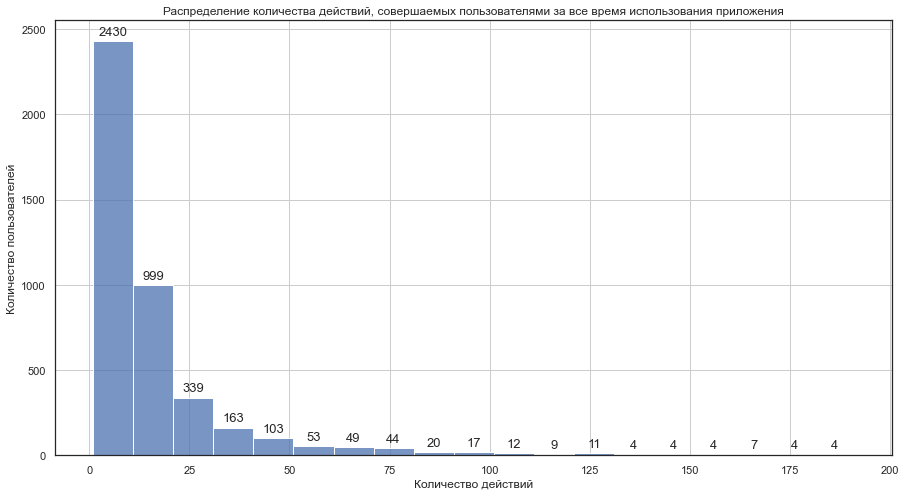

In [22]:
plot = sns.histplot(data=users_actions[users_actions['actions_count']<=200], x='actions_count', binwidth=10)

plot.set_title('Распределение количества действий, совершаемых пользователями за все время использования приложения')
plot.set(xlabel='Количество действий', ylabel='Количество пользователей')
plt.grid()

for p in plot.patches:
    if (p.get_height() > 0):
        plot.annotate(format(p.get_height()),(p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center', xytext = (0, 9), size = 13, textcoords = 'offset points')

**Вывод**: В среднем пользователи в приложении совершили порядка 17 действий за весь рассматриваемый период. Лишь 1% пользователей совершили более 132 действий в приложении. Прежде, чем отнести этих пользователей к аномальным, далее подробно изучим их действия, в том числе совершали ли они целевое действие.

<a id='section3-5'></a>
### 3.5 Анализ действий пользователей, совершающих минимальное и максимальное количество действий в приложении

Начнем с изучения пользователей, совершивших более 132 действий.

In [23]:
print('Всего пользователей, совершивших более 132 действий:', 
       users_actions[users_actions['actions_count'] > 132]['user_id'].count())

Всего пользователей, совершивших более 132 действий: 42


Добавим каждому user_id количество совершенных им действий.

In [24]:
users = users.merge(users_actions, how='left', on='user_id')

Для того, чтобы понять являются пользователи с количеством действий равным 1 или больше 132 аномальными, изучим количество совершенных ими действий. Например, если у пользователя 400 одинаковых действий, то это скорее выброс, а если 400 разных действий, то это просто любитель поискать всякие вещи.

In [25]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

users[users['actions_count'] > 132].pivot_table(
                                                index='user_id', 
                                                columns='event_name', 
                                                values='event_time',
                                                aggfunc='nunique',
                                                ).fillna(0)

event_name,advert_open,contacts_show,favorites_add,map,photos_show,search_1,search_2,search_3,search_4,search_5,search_6,search_7,tips_click,tips_show
user_id,,,,,,,,,,,,,,
04d0b1b4-d31f-4c19-bc7e-14e5fcf6f791,2.0,0.0,14.0,11.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,142.0
06bdb96e-2712-47b3-a0af-d19f297abd6c,0.0,8.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,115.0
0d5c7fc6-7a74-4a7d-a7f6-f19a739365f6,137.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0d9e5bb7-0ad6-4b62-a118-b1e4f5b31dfa,39.0,0.0,0.0,45.0,0.0,0.0,0.0,0.0,35.0,0.0,0.0,13.0,0.0,30.0
1580911b-65db-4f1a-be7e-1ca39becac30,76.0,5.0,0.0,10.0,0.0,0.0,1.0,21.0,2.0,1.0,0.0,0.0,1.0,148.0
1e49028e-e90e-4b27-9467-c101d8f94156,82.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,157.0
21230dd9-2f7f-4b77-a436-43d4d10388e0,0.0,43.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,346.0
28fccdf4-7b9e-42f5-bc73-439a265f20e9,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,294.0
2ce6c413-30d2-4d26-8b83-0bd21bc66546,0.0,0.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,172.0


Можно видеть, что эти пользователм совершали разные действий. В связи с этим считать их аномальными и удалять не будем.  

Теперь посмотрим на пользователей, совершивших одно действие.

In [26]:
print('Всего пользователей, совершивших 1 действие:', 
       users_actions[users_actions['actions_count'] == 1]['user_id'].count())

Всего пользователей, совершивших 1 действие: 65


In [27]:
pd.set_option('display.max_rows', 70)
users[users['actions_count'] == 1].groupby(['user_id','event_name'])['event_time'].count().reset_index()

,user_id,event_name,event_time
0,0729a0c7-9e58-4ea9-92bf-33830024ee68,tips_show,1
1,07b1849e-eb60-444d-98cb-f8516ad23a74,tips_show,1
2,0ba4e644-8d45-48b4-a8eb-98e5687ca092,tips_show,1
3,0dea426d-4547-47d3-9ba2-716db6ca789b,map,1
4,0f579ce9-7646-430a-91de-1d6d93e2a4d2,contacts_show,1
5,11c4e5be-6d55-4c4b-b207-3fa7a5e5b9bf,map,1
6,11e5ea85-e947-4099-936d-25be5d541163,map,1
7,1828893a-1db7-40aa-b410-fe49a48a2e4b,search_7,1
8,1af91ec7-e097-4a89-bd62-78cd0b6401e8,map,1
9,1d7bebb1-a926-4d15-b053-1b3c2eb76134,tips_show,1


Таких пользователей тоже немного (65), часть из них совершала целевое действие, большинство просто увидели объявления (tips_show). Удалять этих пользователей тоже не будем.  

**Вывод**: Пользователи, совершившие очень много или очень мало действий в приложении не относятся к аномальным, а значит их логи выбросами считать не будем.

<a id='section3-6'></a>
### 3.6 Определение самого популярного действия

Для определения самого популярного действия воспользуемся методом value_counts().

In [28]:
users['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4529
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
Name: event_name, dtype: int64

**Вывод**: Самым популярным действием является tips_show - объявление вылезло в качестве рекомендованного пользователю. При дальнейшем анализе учитывать tips_show как полноценное действие пользователя было бы некорректно, так как фактически пользователь не делает какого-то действия, мы даже не можем быть уверены, что он действительно изучил это объявление, tips_show - просто факт того,что карточка товара вылезла пользователю.

Далее по популярности photos_show - просмотр фото в объявлении, после него открытие объявления и показ контактов. Возможно, в нашем мобильном приложении у пользователя есть возможность посмотреть фото и контакты не переходя на страничку самого объявления.

<a id='section3-7'></a>
### 3.7 Сколько раз было выполнено целевое действие - просмотр карточки контактов?

In [29]:
print('Количество раз, когда пользователи выполнили целевое действие:',
      users[users['event_name'] == 'contacts_show']['event_name'].count())
print('Доля целевого действия:',
      round(users[users['event_name'] == 'contacts_show']['event_name'].count()/len(users['event_name'])*100, 2), '%')

Количество раз, когда пользователи выполнили целевое действие: 4529
Доля целевого действия: 6.1 %


**Вывод**: Всего 6% всех действий пользователей в приложении - целевое действие.

<a id='section3-8'></a>
### 3.8 Сколько уникальных пользователей выполнили целевое действие? Сколько раз целевое действие выполянется пользователями?

Посчитаем сколько уникальных пользователей посмотрели карточку контаков.

In [30]:
print('Уникальных пользователей посмотревших карточку контакта:',
     users[users['event_name'] == 'contacts_show']['user_id'].nunique())

Уникальных пользователей посмотревших карточку контакта: 981


В отдельный датафрейм сохраним id пользователей и сколько раз они посмотрели карточку контактов.

In [31]:
users_watched_contacts = (users[users['event_name'] == 'contacts_show'].groupby('user_id')
                                                                       .agg({'event_name':'count'})
                                                                       .reset_index()
                                                                       .rename(columns={'event_name':'contacts_watched'})
                                                                       .sort_values(by='contacts_watched', ascending=False))

Изучим гистограмму количества просмотров карточки товаров уникальными пользователями.

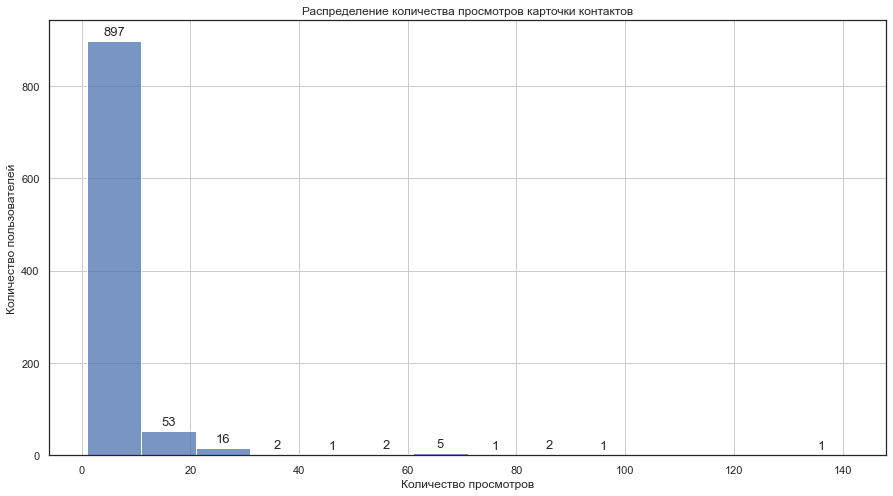

In [32]:
plot = sns.histplot(data=users_watched_contacts, x='contacts_watched', binwidth=10)

plot.set_title('Распределение количества просмотров карточки контактов')
plot.set(xlabel='Количество просмотров', ylabel='Количество пользователей')
plt.grid()

for p in plot.patches:
    if (p.get_height() > 0):
        plot.annotate(format(p.get_height()),(p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center', xytext = (0, 9), size = 13, textcoords = 'offset points')

Изучим значения методом describe().

In [33]:
users_watched_contacts.describe()

,contacts_watched
count,981.000000
mean,4.616718
std,9.621611
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,137.000000


**Вывод**: 75% пользователей совершили целевое действие не более 4 раз, в оставшиеся 25% входят пользователи, просмотревшие карточку контакта от 5 до 137 раз.

<a id='section3-9'></a>
### 3.9 Анализ действий пользователей во времени. Определение количества всех действий/целевого действия в неделю/месяц. Количество целевых действий на пользователя в разрезе по времени

Добавим в датасет users столбцы с неделей и месяцем совершения действия.

In [34]:
users['event_month'] = pd.DatetimeIndex(users['event_time']).month
users['event_week'] = users.event_time.apply(lambda x: x.weekofyear)

Построим графики зависимости количества действий пользователей для разных временных интервалов. 

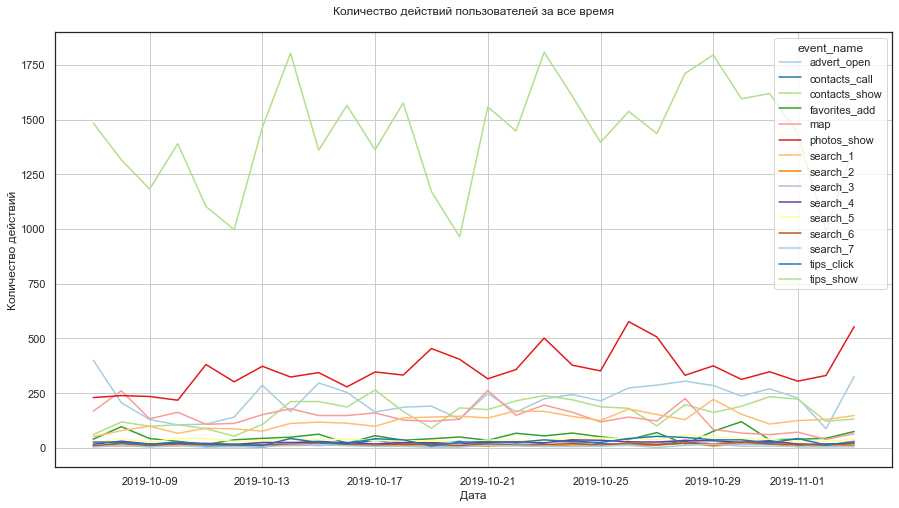

In [35]:
sns.lineplot(data=(users.groupby(['event_date', 'event_name'])
                        .agg({'event_time':'count'})
                        .reset_index()), 
             x='event_date', y='event_time', hue='event_name', palette='Paired')
plt.grid()
plt.title('Количество действий пользователей за все время\n')
plt.xlabel('Дата')
plt.ylabel('Количество действий');

Как ранее было определено, действие tips_show самое популярное и неконтролируемое с точки зрения анализа. Изучим тот же график для остальных действий более подробно.

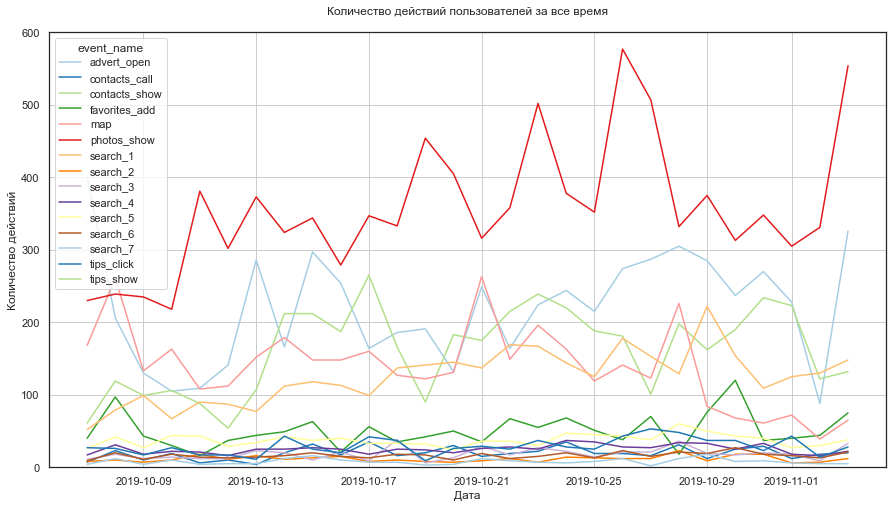

In [36]:
sns.lineplot(data=(users.groupby(['event_date', 'event_name'])
                        .agg({'event_time':'count'})
                        .reset_index()), 
             x='event_date', y='event_time', hue='event_name', palette='Paired')
plt.grid()
plt.title('Количество действий пользователей за все время\n')
plt.xlabel('Дата')
plt.ylabel('Количество действий')
plt.ylim(0,600);

Ориентировчно с 13 октября заметен рост действия показа контактов, который держится примерно на одном уровне до конца рассматриваемого промежутка времени.  

Посмотрим распределение количества действий пользователей по неделям.

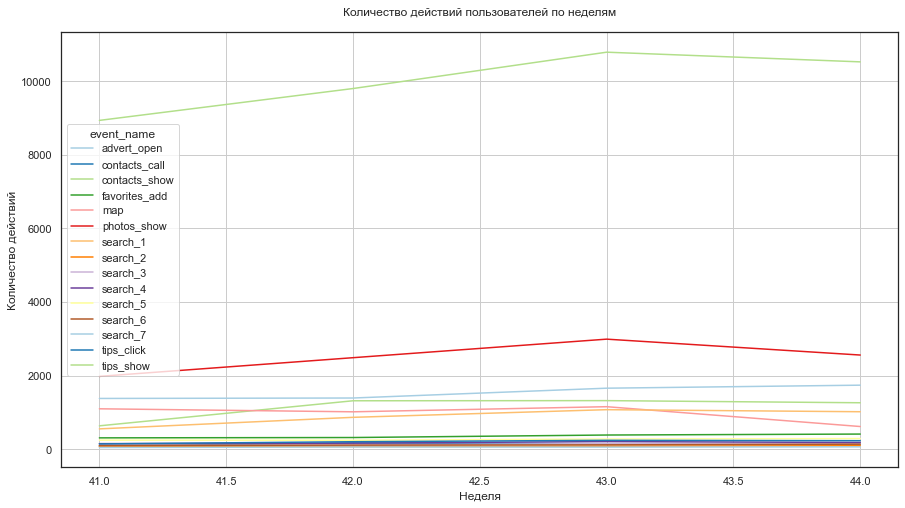

In [37]:
sns.lineplot(data=(users.groupby(['event_week', 'event_name'])
                        .agg({'event_time':'count'})
                        .reset_index()), 
             x='event_week', y='event_time', hue='event_name', palette='Paired')
plt.grid()
plt.title('Количество действий пользователей по неделям\n')
plt.xlabel('Неделя')
plt.ylabel('Количество действий');

Также подробнее изучим область без действия tips_show.

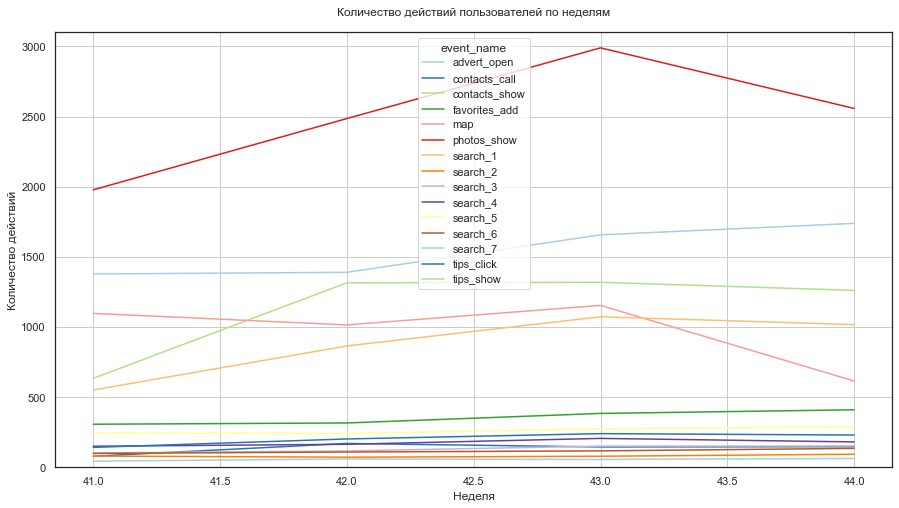

In [38]:
sns.lineplot(data=(users.groupby(['event_week', 'event_name'])
                        .agg({'event_time':'count'})
                        .reset_index()), 
             x='event_week', y='event_time', hue='event_name', palette='Paired')
plt.grid()
plt.title('Количество действий пользователей по неделям\n')
plt.xlabel('Неделя')
plt.ylabel('Количество действий')
plt.ylim(0,3100);

В разрезе по неделям можно видеть сильный рост просмотра фотографий к 43-й неделе (21.10-27.10) и его спад к концу рассматриваемого периода (28.10-03.11). Такой же высокий рост наблюдается и для целевого действия просмотра контактов - порядка 1400 действий к 42 неделе (14.10-20.10).

Аналогично изучим количество целевых действий в разрезе по времени.

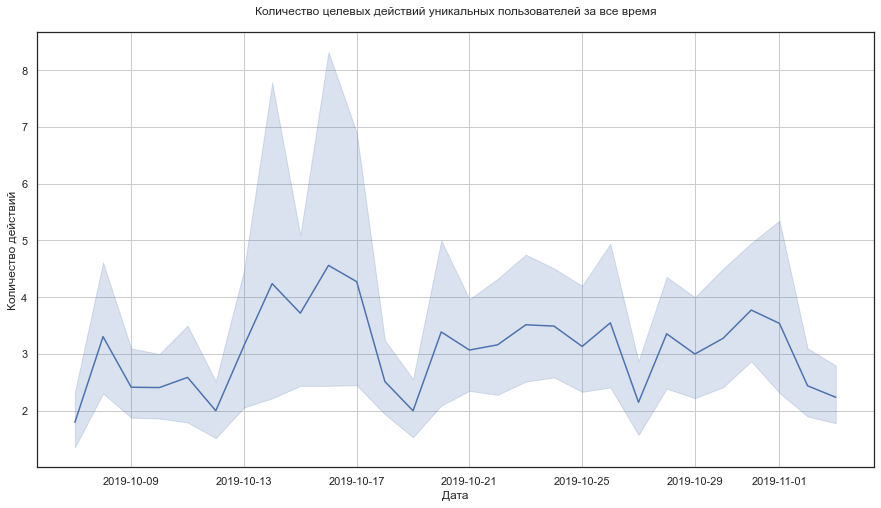

In [39]:
sns.lineplot(data=(users[users['event_name'] == 'contacts_show'].groupby(['event_date', 'user_id'])
                                                                .agg({'event_name':'count'})
                                                                .reset_index()), 
             x='event_date', y='event_name', palette='Paired')
plt.grid()
plt.title('Количество целевых действий уникальных пользователей за все время\n')
plt.xlabel('Дата')
plt.ylabel('Количество действий');

**Вывод**: В период с 13 по 17 октября целевое действие выполнялось чаще, чем в другие дни. Возможно, в это время в приложение пришли новые пользователи.

<a id='section3-9'></a>
### 3.10 Определение длительности сессий пользователей

Для идентификации отдельных пользовательских сессий использовался метод, предложенный здесь: https://stackoverflow.com/questions/54075233/use-dataframes-to-identify-sessions

Отдельными сессиями будем считать те, разница между которыми составляет более 5 минут. 
Используя мобильное приложение по продаже вещей, пользователь может зайти туда с какой-то конкретной целью, долго ее искать, или же пользователь заходит просто посмотреть каталог. 5 минут кажется оптимальным интервалом для разделения сессий, так как за это время вне приложения теряется концентрация, внимание и в следующий заход в приложение (даже через 5 минут) у пользователя может быть уже другая цель, что как раз стоит разделять разными сессиями. Если сделать интервал между сессиями 10 и более минут, то случайно можно отнести несколько различных запросов (целей поиска) пользователя в один.

In [40]:
#для каждой группы с кумулятивной суммой определим разницу 5 минут
g = (users.groupby('user_id')['event_time'].diff() > pd.Timedelta('5Min')).cumsum()
#создадим счетчик групп
users['session_id'] = users.groupby(['user_id', g], sort=False).ngroup() + 1
users.head()

,user_id,event_time,event_date,event_name,source,actions_count,event_month,event_week,session_id
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,2019-10-07,tips_show,other,35,10,41,1
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:40:31.052909,2019-10-07,tips_show,other,35,10,41,1
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:41:05.722489,2019-10-07,tips_show,other,35,10,41,1
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:43:20.735461,2019-10-07,tips_show,other,35,10,41,1
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:45:30.917502,2019-10-07,tips_show,other,35,10,41,1


Изучим распределение количества сессий на пользователя.

In [41]:
sessions_per_user = users.groupby('user_id')['session_id'].nunique().reset_index()

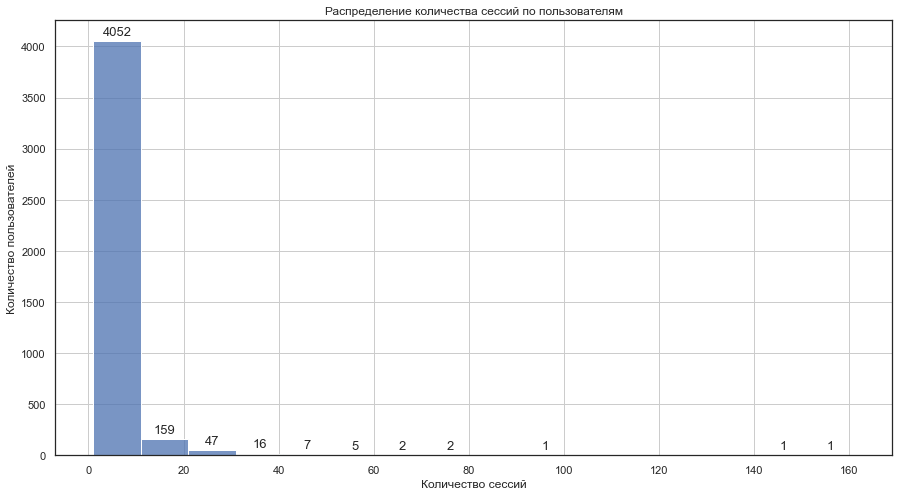

In [42]:
plot = sns.histplot(data=sessions_per_user, x='session_id', binwidth=10)

plot.set_title('Распределение количества сессий по пользователям')
plot.set(xlabel='Количество сессий', ylabel='Количество пользователей')
plt.grid()

for p in plot.patches:
    if (p.get_height() > 0):
        plot.annotate(format(p.get_height()),(p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center', xytext = (0, 9), size = 13, textcoords = 'offset points')

In [43]:
sessions_per_user.describe()

,session_id
count,4293.000000
mean,3.812253
std,6.215992
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,152.000000


**Вывод**: Большинство пользователей (4052) совершили не более 10 сессий за весь рассматриваемый период. 159 человек совершили от 10 до 20 сессий и 47 - от 20 до 30. Большее количество сессий у единичных пользователей.

Далее вычислим длительность сессий для пользователей.

In [44]:
sessions = pd.DataFrame()
sessions['start_time'] = users.groupby('session_id')['event_time'].min()
sessions['finish_time'] = users.groupby('session_id')['event_time'].max()
sessions['duration_minutes'] = sessions['finish_time'] - sessions['start_time']
sessions = sessions.reset_index()
sessions['duration_minutes'] = sessions['duration_minutes'].apply(lambda x: round(x.total_seconds()/60, 2))
sessions.head()

,session_id,start_time,finish_time,duration_minutes
0,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,9.93
1,2,2019-10-09 18:33:55.577963,2019-10-09 18:35:28.260975,1.54
2,3,2019-10-09 18:40:28.738785,2019-10-09 18:42:22.963948,1.90
3,4,2019-10-21 19:52:30.778932,2019-10-21 20:07:30.051028,14.99
4,5,2019-10-22 11:18:14.635436,2019-10-22 11:30:52.807203,12.64


Теперь для каждого номера сессии добавим соответствующий user_id.

In [45]:
users_sessions = users.groupby('session_id').agg({'user_id':'first'}).reset_index()
sessions = sessions.merge(users_sessions, how='left', on='session_id')

Посчитаем и построим график средней длительности сессии для каждого пользователя.

In [46]:
avg_session_duration = sessions.groupby('user_id')['duration_minutes'].mean().reset_index()
avg_session_duration.describe()

,duration_minutes
count,4293.000000
mean,5.390008
std,6.257645
min,0.000000
25%,1.608571
50%,3.570000
75%,6.990000
max,95.440000


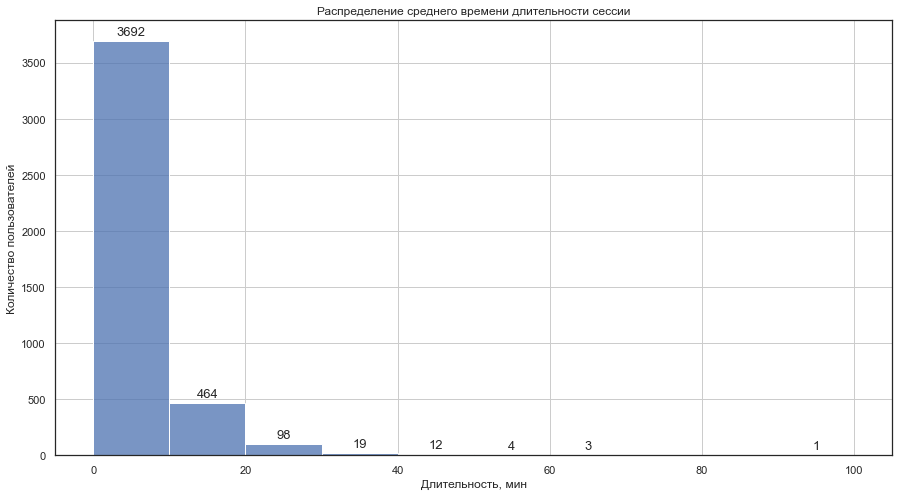

In [47]:
plot = sns.histplot(data=avg_session_duration, x='duration_minutes', binwidth=10)

plot.set_title('Распределение среднего времени длительности сессии')
plot.set(xlabel='Длительность, мин', ylabel='Количество пользователей')
plt.grid()

for p in plot.patches:
    if (p.get_height() > 0):
        plot.annotate(format(p.get_height()),(p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center', xytext = (0, 9), size = 13, textcoords = 'offset points')

У большинства пользователей (3692) одна сессия в среднем длится не более 10 минут, у 464 пользователей сессия длится от 10 до 20 минут. Лишь у 98 человек длительность одной сессии может достигать 30 минут. Остальные единичные случаи продолжительности сессии вплоть до 95 минут могут быть связаны с техническими сложностями при выгрузке логов, например.  

Посчитаем среднее количество действий за сессию для пользователей.

In [48]:
events_per_session = users.groupby(['session_id', 'user_id'])['event_name'].count().reset_index()
avg_events_per_session = events_per_session.groupby('user_id')['event_name'].mean().reset_index()
avg_events_per_session.describe()

,event_name
count,4293.000000
mean,5.659931
std,5.887174
min,1.000000
25%,2.500000
50%,4.000000
75%,6.666667
max,97.000000


Посчитаем среднее количество сессий для пользователя в неделю.

In [49]:
sessions_per_week = users.groupby(['user_id', 'event_week'])['session_id'].nunique().reset_index()
sessions_per_week = sessions_per_week.groupby('user_id')['session_id'].mean().reset_index()
sessions_per_week['session_id'] = sessions_per_week['session_id'].round(0).astype('int')
sessions_per_week.describe()

,session_id
count,4293.000000
mean,2.721174
std,2.709242
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,50.000000


**Вывод**: В среднем за одну сессию большинство пользователей совершает не более 7 действий. При этом пользователи совершают в среднем порядка 3х сессий в неделю.

<a id='section3-11'></a>
### 3.11 Определение характерных признаков для сегментирования

На основании посчитанных ранее величин составим таблицу признаков для кластеризации пользователей.

In [50]:
# из таблицы users возьмем столбцы с user_id, источником, суммарным количеством действий и номером недели первого действия
features = users[['user_id', 'source', 'actions_count', 'event_week']]
features = features.groupby('user_id').agg({'source':'first', 'actions_count':'first', 'event_week':'first'}).reset_index()

# добавим среднюю длительность сессии
features = features.merge(avg_session_duration, on='user_id', how='left')

# добавим количество раз, когда было выполнено целевое дейтствие
features = features.merge(users_watched_contacts, on='user_id', how='left')
features['contacts_watched'] = features['contacts_watched'].fillna(0)

# создадим таблицы с датой первого и последнего действия в приложении для того, чтобы вычислить время,
# проведенное пользователем в приложении 
first_event_time = users.groupby('user_id')['event_time'].first().reset_index().rename(columns=({'event_time':'first_event'}))
last_event_time = users.groupby('user_id')['event_time'].last().reset_index().rename(columns=({'event_time':'last_event'}))
features = features.merge(first_event_time, on='user_id', how='left')
features = features.merge(last_event_time, on='user_id', how='left')

# переименум столбцы
features = features.rename(columns=({'actions_count':'all_actions_made',
                                     'duration_minutes':'avg_session_duration_min',
                                     'contacts_watched':'target_action_count',
                                     'first_event':'date_of_first_action',
                                     'last_event':'date_of_last_action',
                                     'event_week':'first_event_week'}))

# приведем данные к нужным типам, округлим значения до 2-го знака после запятой где необходимо
features['target_action_count'] = features['target_action_count'].astype('int')
features['avg_session_duration_min'] = features['avg_session_duration_min'].round(2)
features['date_of_first_action'] = features['date_of_first_action'].dt.date
features['date_of_last_action'] = features['date_of_last_action'].dt.date

# вычислим время, проведенное в приложении
features['days_in_app'] = (features['date_of_last_action'] - features['date_of_first_action']).dt.days

# обозначим источники скачивания приложения как 1-yandex, 2-google, 3-other
features.loc[features['source'] == 'yandex', 'source'] = 1
features.loc[features['source'] == 'google', 'source'] = 2
features.loc[features['source'] == 'other', 'source'] = 3
features['source'] = features['source'].astype('int')

# добавим количество сессий на пользователя и среднее количество действий в сессию
features = features.merge(sessions_per_user, on='user_id', how='left')
features = features.merge(avg_events_per_session, on='user_id', how='left')
features = features.rename(columns=({'session_id':'sessions_per_user', 'event_name':'avg_events_per_session'}))
features['avg_events_per_session'] = features['avg_events_per_session'].round(2)

# добавим среднее количество сессий в неделю
features = features.merge(sessions_per_week, on='user_id', how='left').rename(columns=({'session_id':'avg_sessions_per_week'}))

# вычислим среднее количество целевого действия в сессию
features['avg_target_action_per_session'] = features['target_action_count']/features['sessions_per_user'].round(2)

#удалим столбцы с датой первого и последнего действия
features = features.drop(columns=['date_of_first_action', 'date_of_last_action'])

# выведем первые 5 строк таблицы признаков
features.head()

,user_id,source,all_actions_made,first_event_week,avg_session_duration_min,target_action_count,days_in_app,sessions_per_user,avg_events_per_session,avg_sessions_per_week,avg_target_action_per_session
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3,35,41,8.20,0,15,5,7.00,2,0.000000
1,00157779-810c-4498-9e05-a1e9e3cedf93,1,71,42,4.04,11,15,17,4.18,6,0.647059
2,00463033-5717-4bf1-91b4-09183923b9df,1,10,44,7.86,0,0,2,5.00,2,0.000000
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2,32,42,1.12,0,13,13,2.46,4,0.000000
4,00551e79-152e-4441-9cf7-565d7eb04090,1,8,43,0.72,3,4,4,2.00,2,0.750000


In [51]:
features = pd.get_dummies(features, columns=['source'])

In [52]:
features.head()

,user_id,all_actions_made,first_event_week,avg_session_duration_min,target_action_count,days_in_app,sessions_per_user,avg_events_per_session,avg_sessions_per_week,avg_target_action_per_session,source_1,source_2,source_3
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,35,41,8.20,0,15,5,7.00,2,0.000000,0,0,1
1,00157779-810c-4498-9e05-a1e9e3cedf93,71,42,4.04,11,15,17,4.18,6,0.647059,1,0,0
2,00463033-5717-4bf1-91b4-09183923b9df,10,44,7.86,0,0,2,5.00,2,0.000000,1,0,0
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,32,42,1.12,0,13,13,2.46,4,0.000000,0,1,0
4,00551e79-152e-4441-9cf7-565d7eb04090,8,43,0.72,3,4,4,2.00,2,0.750000,1,0,0


Отберем признаки для кластеризации. Параметры, характеризующие суммарное количество какого-либо показателя, следует удалить перед кластеризацией, так как поведение пользователей пришедших в первую и последнюю неделю может быть схожим, но такой параметр как "суммарное количество действий" добавит таких пользователей в разные сегменты.  

Таким образом, из признаков исключим столбцы 'all_actions_made', 'target_action_count', 'sessions_per_user'.

In [53]:
features_for_clusters = features.drop(columns=['all_actions_made', 'target_action_count', 'sessions_per_user'])
features_for_clusters.head()

,user_id,first_event_week,avg_session_duration_min,days_in_app,avg_events_per_session,avg_sessions_per_week,avg_target_action_per_session,source_1,source_2,source_3
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,41,8.20,15,7.00,2,0.000000,0,0,1
1,00157779-810c-4498-9e05-a1e9e3cedf93,42,4.04,15,4.18,6,0.647059,1,0,0
2,00463033-5717-4bf1-91b4-09183923b9df,44,7.86,0,5.00,2,0.000000,1,0,0
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,42,1.12,13,2.46,4,0.000000,0,1,0
4,00551e79-152e-4441-9cf7-565d7eb04090,43,0.72,4,2.00,2,0.750000,1,0,0


## Часть 4. Сегментирование пользователей на основе действий

<a id='section4-1'></a>
### 4.1 Изучение средних значений признаков

Методом describe() изучим средние значения признаков.

In [54]:
features_for_clusters.describe()

,first_event_week,avg_session_duration_min,days_in_app,avg_events_per_session,avg_sessions_per_week,avg_target_action_per_session,source_1,source_2,source_3
count,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000
mean,42.412299,5.390016,2.613324,5.659932,2.721174,0.275455,0.450501,0.262986,0.286513
std,1.090738,6.257610,5.187808,5.887179,2.709242,1.346081,0.497602,0.440306,0.452185
min,41.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,1.610000,0.000000,2.500000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,3.570000,0.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,6.990000,3.000000,6.670000,3.000000,0.000000,1.000000,1.000000,1.000000
max,44.000000,95.440000,27.000000,97.000000,50.000000,62.000000,1.000000,1.000000,1.000000


**Вывод**: Большая часть пользователей пришла в приложение на 42-й неделе (ранее на графиках наблюдался рост выполнения как целевого, так и других действий, в этот период) и провела в нем в пределах 3-х дней. В среднем пользовательская сессия длится порядка 5.5 минут и за нее пользователь успевает совершить около 6 действий. На неделе в среднем пользователи совершают около 3-х сессий.

<a id='section4-2'></a>
### 4.2 Построение матрицы корреляций и её отображение

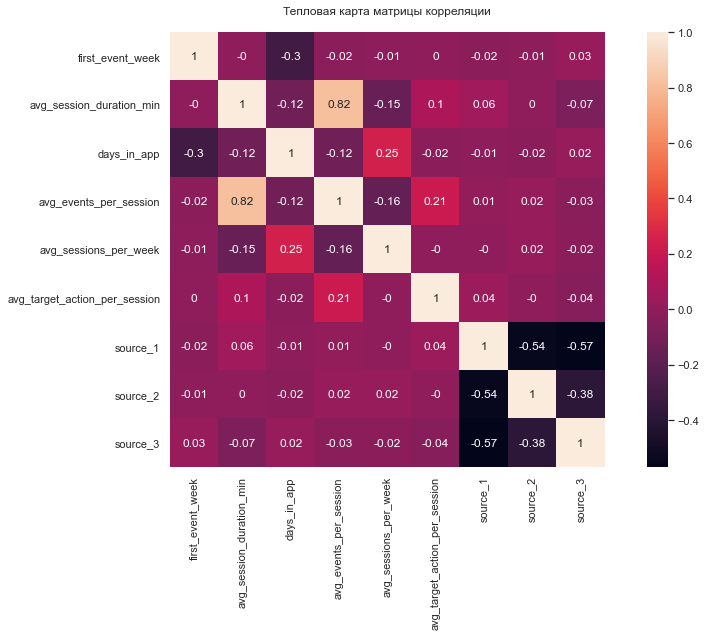

In [55]:
corr_m = features_for_clusters.corr().round(2)

sns.heatmap(data=corr_m, square = True, annot = True)

plt.grid()
plt.title('Тепловая карта матрицы корреляции'+ "\n");

**Вывод**: Большинство признаков между сосбой практически не коррелируют. Коррелируют, но не критично - среднее количество действий за сессию и средняя длительность сессии. Это ожидаемо, ведь, чем длительнее сессия, тем больше действий можно успеть выполнить.

<a id='section4-3'></a>
### 4.3 Построение дендрограммы. Определение количества кластеров

In [56]:
# создадим объект класса StandardScaler
scaler = StandardScaler()
# обучаем нормализатор и преобразуем набор данных 
x_sc = scaler.fit_transform(features_for_clusters.drop(columns = 'user_id')) 

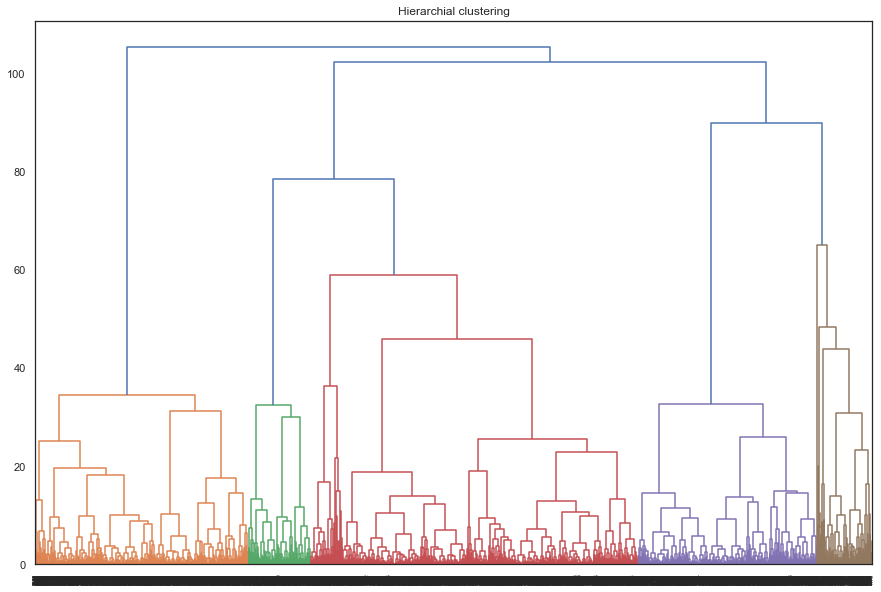

In [64]:
linked = linkage(x_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering');

На дендрограмме получили 5 кластеров.Обучим модель, изучим средние значения.

In [59]:
# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)
# прогнозируем кластеры для наблюдений
labels = km.fit_predict(x_sc)
# сохраняем метки кластера в поле нашего датасета
features['cluster_km'] = labels

In [60]:
# выводим статистику по средним значениям наших признаков по кластеру
clusters = features.groupby(['cluster_km']).mean()
clusters

,all_actions_made,first_event_week,avg_session_duration_min,target_action_count,days_in_app,sessions_per_user,avg_events_per_session,avg_sessions_per_week,avg_target_action_per_session,source_1,source_2,source_3
cluster_km,,,,,,,,,,,,
0,13.145473,42.491353,4.469919,0.778230,1.332655,3.054934,4.883123,2.605290,0.240285,0.000000,1.000000,0.000000
1,12.879373,42.484922,4.728474,0.770808,1.307600,3.012666,4.712135,2.587455,0.247755,1.000000,0.000000,0.000000
2,51.933333,41.436111,3.543361,4.000000,16.861111,13.425000,3.809000,4.966667,0.195806,0.461111,0.233333,0.305556
3,36.995413,42.311927,24.178670,1.802752,0.738532,1.623853,23.616972,1.477064,1.234979,0.504587,0.284404,0.211009
4,12.253259,42.575419,4.058696,0.608007,1.405959,2.961825,4.809609,2.533520,0.182343,0.000000,0.000000,1.000000


In [61]:
# для кластеров посчитаем количество записей в каждом
features.groupby(['cluster_km'])['user_id'].count()

cluster_km
0     983
1    1658
2     360
3     218
4    1074
Name: user_id, dtype: int64

В результате кластеризации получили 5 кластеров. 
У кластеров 0, 1 и 4 различны только признаки источника, в то время как кластеры 2 и 3 демонстрируют другое поведение пользователей.
Явно видно, что при кластеризации основную роль сыграл признак источника (группы 0,1,4). Средние значения других признаков в этих кластерах близки друг к другу, что говорит о схожем поведении пользователей в них. Получается, что подобная кластеризация некорректна, так как пользователи разделены на кластеры не по поведению, а по источнику установки приложения.

Кластеризация основана на расчете евклидова расстояния между объектами в n-мерном пространстве признаков. У нас получились три признака со значениями 0/1. Если уменьшить амплитуду разброса между признаками, то удастся понизить их влияние на итоговое расстояние между точками. Для этого попробуем уменьшить влияние признака источника путем умножения его значения на 0.5 после стандартизации.

Для этого обучим нормализатор и преобразуем набор данных.

In [62]:
x_sc_weighted = scaler.fit_transform(features_for_clusters.drop(columns = 'user_id')) 
source_weight = 0.5
x_sc_weighted[:, -3:] = x_sc_weighted[:, -3:] * source_weight

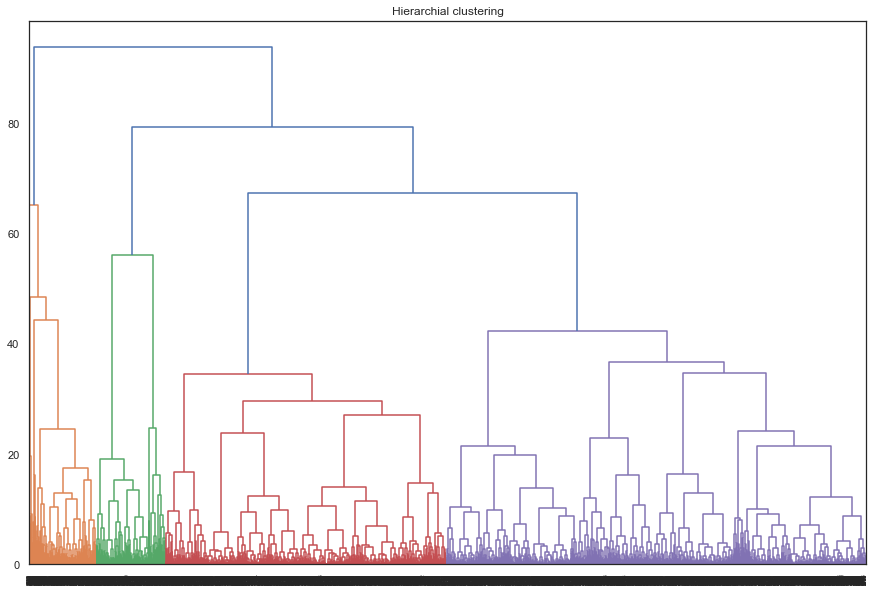

In [63]:
linked_w = linkage(x_sc_weighted, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked_w, orientation='top')
plt.title('Hierarchial clustering');

Получили 4 кластера.

<a id='section4-4'></a>
### 4.4 Обучение модели кластеризации, прогнозирование кластеров пользователей

In [65]:
# задаём модель k_means с числом кластеров 4 и фиксируем значение random_state
km = KMeans(n_clusters=4, random_state=0)
# прогнозируем кластеры для наблюдений
labels = km.fit_predict(x_sc_weighted)
# сохраняем метки кластера в поле нашего датасета
features['cluster_km'] = labels

<a id='section4-5'></a>
### 4.5 Изучение средних значений признаков для кластеров

In [66]:
# выводим статистику по средним значениям наших признаков по кластеру
clusters = features.groupby(['cluster_km']).mean()
clusters

,all_actions_made,first_event_week,avg_session_duration_min,target_action_count,days_in_app,sessions_per_user,avg_events_per_session,avg_sessions_per_week,avg_target_action_per_session,source_1,source_2,source_3
cluster_km,,,,,,,,,,,,
0,33.920962,42.340206,21.928179,1.429553,0.749141,1.652921,21.227491,1.498282,0.989034,0.477663,0.285223,0.237113
1,46.542471,41.654440,3.471081,3.511583,14.548263,12.013514,3.779459,4.953668,0.209544,0.426641,0.258687,0.314672
2,11.502499,43.470294,4.299994,0.659634,0.890061,2.793448,4.651954,2.559134,0.228672,0.444753,0.254303,0.300944
3,11.587047,41.525847,4.287540,0.657160,1.106358,2.751634,4.625645,2.418895,0.222424,0.459299,0.269756,0.270945


In [67]:
# для кластеров посчитаем количество записей в каждом
features.groupby(['cluster_km'])['user_id'].count()

cluster_km
0     291
1     518
2    1801
3    1683
Name: user_id, dtype: int64

Получившиеся кластеры теперь разделены корректно, и признак источника не играет решающую роль. Опишем новые кластеры: 
 - Кластер 2 (1801 пользователь) - преимущественно пришли с источника yandex и other в середине 43-й недели, провели в приложении менее 1 дня, совершили порядка 12 действий (вероятно без целевого действия) и 3-х сессий, в среднем сессия длится 4 минуты и за нее совершают около 5 действий
 - Кластер 3 (1683 пользователей) - большая часть пришла с yandex, поровну с google и other в середине 41-й недели, в приложении провели более 1 дня, совершили порядка 12 действий и 3-х сессий (вероятно без целевого действия), сессия длится около 4-х минут и за нее совершается порядка 5 действий
 - Кластер 1 (518 пользователей) - преимущественно пришли с источника yandex и other в в середине 41-й недели, самые "старички" приложения - провели в нем более 14 дней, выполнив около 47 действий и 12 сессий, совершили порядка 4-х целевых действий, сессии самые короткие среди кластеров (3.5 минуты), за сессию совершают около 4-х действий
 - Кластер 0 (291 пользователь) - преимущественно пришли с источника yandex и google в середине 42-й недели, в приложении провели меньше всех времени, совершили около 34-х действий и 2-х сессий,совершили около 2-х целевых действий, сессия длится около 22 минут и за нее совершается порядка 21 действия
 
Таким образом, характеризуем кластеры:
 - кластер 0 - зашли с конкретной целью, долго искали нужный товар, открыли карточку контакта, а купив нужный товар про приложение забыли
 - кластер 1 - пришли с yandex или сами, давно используют приложение, часто что-то покупают, в приложении проводят немного времени
 - кластер 2 - пришли с yandex или сами, приложением пользуются недавно, карточку контактов не смотрели - просто посмотрели товары, ничего не купили
 - кластер 3 - пришли с разных источников в начале рассматриваемого периода, преимущественно просто смотрят, не покупают

<a id='section4-6'></a>
### 4.6 Изучение различий между кластерами

In [68]:
# применим silhouette_score библиотеки sklearn
score = silhouette_score(x_sc, labels, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.145


**Вывод**: Полученное значение silhouette score говорит о том, что кластеры различаются и друг друга не перекрывают.

<a id='section4-7'></a>
### 4.7 Сравнение признаков для кластеров (построение графиков)

Посмотрим на значения признаков для кластеров. Сначала для категориальных признаков.

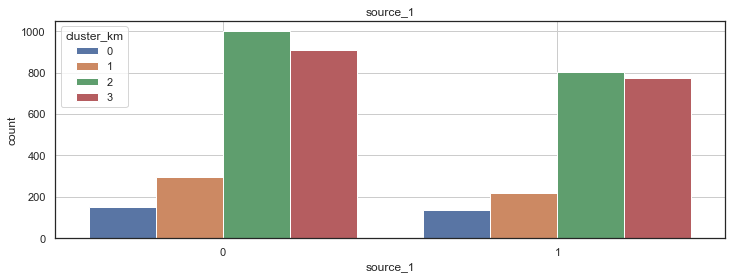

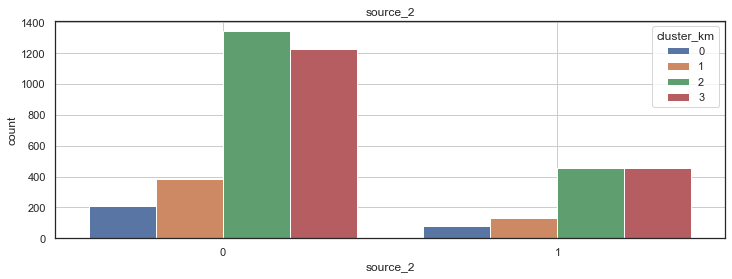

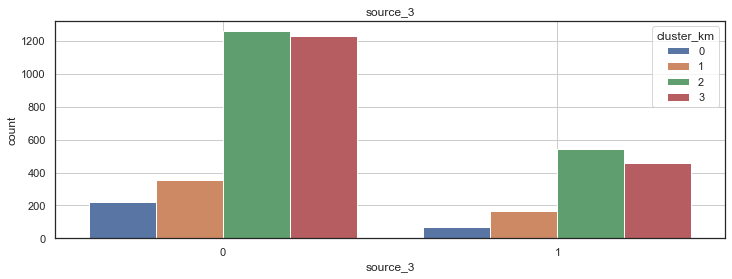

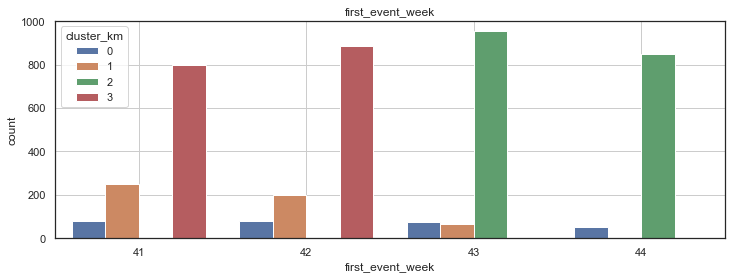

In [69]:
categorical_columns = ['source_1', 'source_2', 'source_3', 'first_event_week']

for c in categorical_columns:
    plt.figure(figsize=(12, 4))
    sns.countplot(x=features[c], hue='cluster_km', data=features)
    plt.title(c)
    plt.grid()
    plt.show();

Теперь изучим значения числовых признаков.

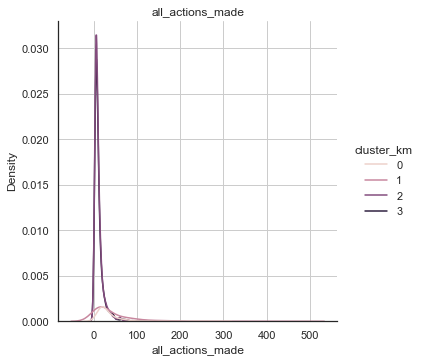

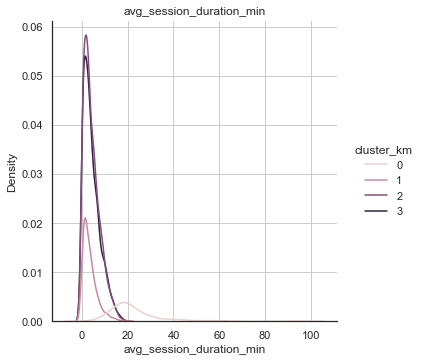

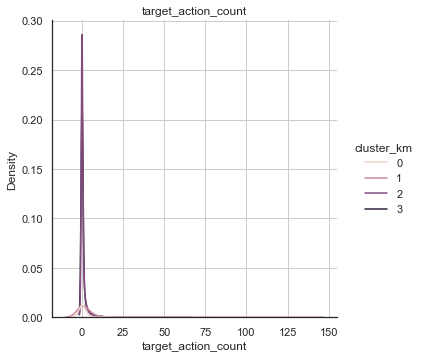

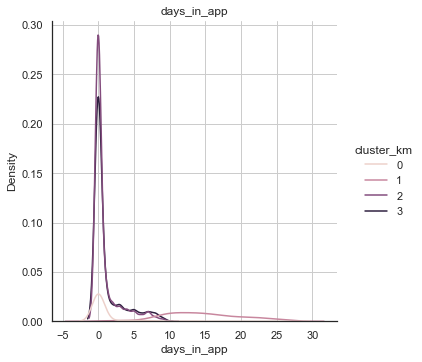

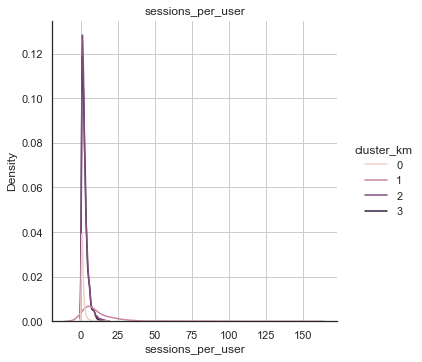

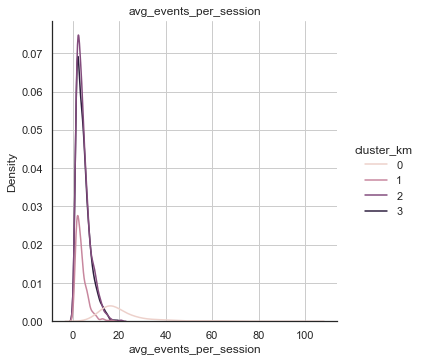

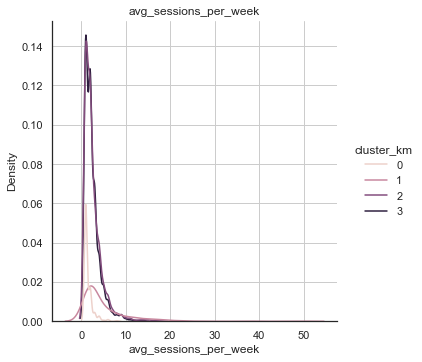

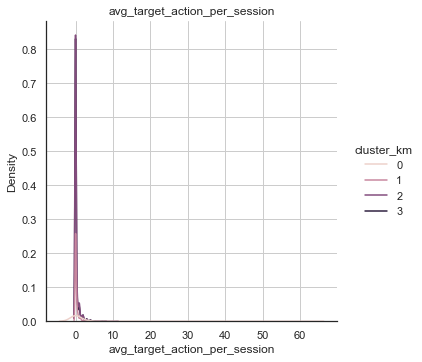

In [70]:
numeric_columns = ['all_actions_made','avg_session_duration_min', 'target_action_count', 'days_in_app', 
                   'sessions_per_user', 'avg_events_per_session', 'avg_sessions_per_week', 'avg_target_action_per_session']

for nc in numeric_columns:
    sns.displot(data=features, x=nc, hue='cluster_km', kind='kde')
    plt.title(nc)
    plt.grid()
    plt.show();

**Вывод**: На графиках можно наглядно увидеть определенные ранее отличия признаков для кластеров.

## Часть 5. Определение пользовательских метрик для кластеров

<a id='section5-1'></a>
### 5.1 Определение retention rate

Для определения retention rate создадим функцию get_retention().

In [71]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=True,
):


    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

      # возвращаем таблицу и сырые данные
    return result_raw, result_grouped

Создадим таблицы profiles и sessions для передачи в функцию get_retention().

In [72]:
profiles = (users.groupby('user_id')[['event_time', 'event_date']].first()
                 .reset_index()
                 .rename(columns=({'event_time':'first_ts', 'event_date':'dt'}))
                 .merge(features[['user_id', 'cluster_km']], how='left', on='user_id'))

sessions = (users.groupby(['user_id', 'session_id'])['event_time'].first()
                 .reset_index()
                 .rename(columns=({'event_time':'session_start'})))

Retention rate будем определять с горизонтом анализа 14 дней.

In [73]:
# доступный интервал привлечения пользователей
min_analysis_date = profiles['dt'].min()

# момент анализа
observation_date = profiles['dt'].max()

# горизонт анализа
analysis_horizon = 14

# построение таблицы удержания
dimensions = ['cluster_km']
retention_raw, retention_grouped = get_retention(profiles, sessions, observation_date, analysis_horizon, dimensions=dimensions)

retention_grouped

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
cluster_km,,,,,,,,,,,,,,,
0,291,1.0,0.034364,0.017182,0.013746,0.017182,0.017182,0.013746,0.010309,0.006873,0.003436,0.003436,0.000000,0.003436,0.003436
1,518,1.0,0.250965,0.279923,0.210425,0.202703,0.216216,0.225869,0.231660,0.237452,0.196911,0.204633,0.196911,0.179537,0.183398
2,1801,1.0,0.090505,0.057190,0.047751,0.036091,0.027207,0.024431,0.020544,0.009439,0.002221,0.000000,0.000000,0.000000,0.000000
3,1683,1.0,0.094474,0.067142,0.051099,0.036839,0.032086,0.028520,0.027926,0.016043,0.006536,0.000000,0.000000,0.000000,0.000000


Теперь построим кривые удержания.

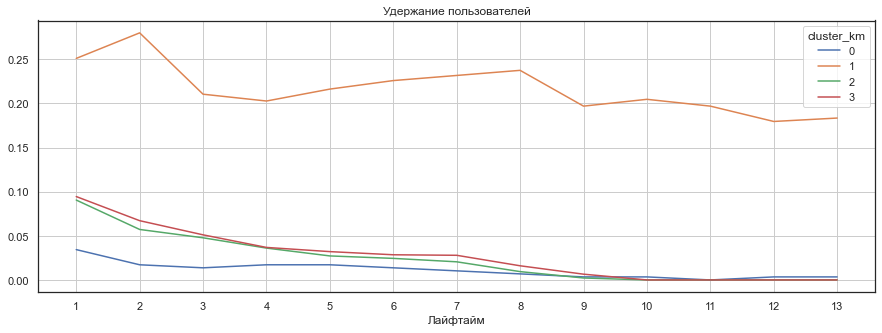

In [74]:
report = retention_grouped.drop(columns = ['cohort_size', 0])

report.T.plot(
    grid=True,  # добавляем сетку
    xticks=list(report.columns.values),  # отметки на оси X — названия колонок
    figsize=(15, 5),  # размер графика
)
plt.xlabel('Лайфтайм')  # название оси X
plt.title('Удержание пользователей')  # название графика
plt.show()

**Вывод**: Лучше всего удерживаются пользователи кластера 1 (20% остается), это по-прежнему долгожители приложения. Кластеры 0,2,3 уходят из приложения к началу 10-го лайфтайма.

<a id='section5-2'></a>
### 5.2 Определение времени, проведенного в приложении

Время, проведенное пользователями в приложении было рассчитано ранее. Изучим его в разрезе по кластерам.

In [75]:
features.groupby('cluster_km').agg({'days_in_app':['mean', 'median']})

days_in_app       
                  mean median
cluster_km                   
0             0.749141      0
1            14.548263     14
2             0.890061      0
3             1.106358      0

**Вывод**: Более 14 дней в приложении провели пользователи 1-го кластера.

<a id='section5-3'></a>
### 5.3 Определение конверсии

В данном случае посчитаем конверсию в целевое действие для каждого кластера.

In [76]:
conversion = (features.query('target_action_count != 0')
                      .groupby('cluster_km')['user_id'].count()
                      .reset_index()
                      .rename(columns=({'user_id':'users_done_target'}))
                      .merge(features.groupby(['cluster_km'])['user_id'].count().reset_index(), how='left', on='cluster_km'))

Добавим столбец с конверсией в %.

In [77]:
conversion['conversion'] = round(conversion['users_done_target']/conversion['user_id']*100, 2)
conversion.sort_values(by='conversion', ascending=False)

,cluster_km,users_done_target,user_id,conversion
1,1,199,518,38.42
2,2,387,1801,21.49
3,3,345,1683,20.50
0,0,50,291,17.18


**Вывод**: Самое высокое значение конверсии у кластера 1 (38.4%), далее кластеры 2 и 3 (самые многочисленные), последний кластер 0 (17.1%) - пользователей мало, но целевое действие совершили.

## Часть 6. Проверка гипотез

<a id='section6-1'></a>
### 6.1 Гипотеза: Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Две эти группы демонстрируют разную конверсию в просмотры контактов

Подставлять в стат. тест два числа со значением конверсии было бы неправильно, для этого в стат тест отправим массивы с количеством выполненных целевых действий пользователей с разных источников.

Введем нулевую и альтернативную гипотезы.   
**Нулевая гипотеза**: Различия в конверсии между пользователями yandex и google отсутствуют.  
**Альтернативная гипотеза**: Есть различия в конверсии между пользователями yandex и google.  

Уровень статистической значимости alpha примем 0.05.  

In [80]:
yandex = features[features['source_1'] == 1]
google = features[features['source_2'] == 1]

print('Пользователи с yandex, совершившие contacts_show:', yandex.query('target_action_count != 0')['user_id'].nunique())
print('Пользователи с google, совершившие contacts_show:', google.query('target_action_count != 0')['user_id'].nunique())

print('Общее количество пользователей с yandex:', yandex['user_id'].nunique())
print('Общее количество пользователей с google:', google['user_id'].nunique())

Пользователи с yandex, совершившие contacts_show: 478
Пользователи с google, совершившие contacts_show: 275
Общее количество пользователей с yandex: 1934
Общее количество пользователей с google: 1129


Проведем z-тест по долям.

In [81]:
import math as mth

alpha = 0.05 

target_users = np.array([478, 275])
all_users = np.array([1934, 1129])

p1 = target_users[0]/all_users[0]
p2 = target_users[1]/all_users[1]

p_combined = (target_users[0] + target_users[1]) / (all_users[0] + all_users[1])

difference = p1 - p2 

z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/all_users[0] + 1/all_users[1]))

distr = st.norm(0, 1)  

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями пользователей, выполнивших contacts_show, есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли пользователей, выполнивших contacts_show, разными'
    ) 

p-значение:  0.8244316027993777
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли пользователей, выполнивших contacts_show, разными


Для наглядности посчитаем общую конверсию по источникам.

In [82]:
features = features.merge(sources, how='left', on='user_id')

In [83]:
conversion_by_source = (features.query('target_action_count != 0')
                                .groupby('source')['user_id'].count()
                                .reset_index()
                                .rename(columns=({'user_id':'users_done_target'}))
                                .merge(features.groupby('source')['user_id'].count().reset_index(), how='left', on='source'))

In [84]:
conversion_by_source['conversion'] = round(conversion_by_source['users_done_target']/conversion_by_source['user_id']*100, 2)
conversion_by_source

,source,users_done_target,user_id,conversion
0,google,275,1129,24.36
1,other,228,1230,18.54
2,yandex,478,1934,24.72


**Вывод**: Статистически значимой разницы в конверсии пользователей с источников yandex и google нет. У пользователей с этих источников конверсия выше, чем у органических (с источника other), что может быть связано с контекстной рекламой, которая привлекла пользователей yandex и google.

<a id='section6-2'></a>
### 6.2 Гипотеза: Retention rate отличается для пользователей из разных кластеров

Для проверки этой гипотезы используем полученные ранее значения коэффициента удержания для 13 лайфтаймов (нулевой не учитываем).

In [85]:
retention_grouped = retention_grouped.drop(columns = ['cohort_size', 0])

In [86]:
retention_cluster_0 = retention_grouped[retention_grouped.index == 0]
retention_cluster_0 = retention_cluster_0.T.rename(columns=({0:'retention_rate'}))

retention_cluster_1 = retention_grouped[retention_grouped.index == 1]
retention_cluster_1 = retention_cluster_1.T.rename(columns=({1:'retention_rate'}))

retention_cluster_2 = retention_grouped[retention_grouped.index == 2]
retention_cluster_2 = retention_cluster_2.T.rename(columns=({2:'retention_rate'}))

retention_cluster_3 = retention_grouped[retention_grouped.index == 3]
retention_cluster_3 = retention_cluster_3.T.rename(columns=({3:'retention_rate'}))

Попарно сравним кластеры. Уровень статистической значимости alpha примем 0.05.  

**Нулевая гипотеза**: Различия в коэффициенте удержания пользователей кластеров 0 и 1 отсутствуют.  
**Альтернативная гипотеза**: Есть различия в коэффициенте удержания пользователей кластеров 0 и 1.  

In [87]:
alpha = 0.05

results = st.mannwhitneyu(retention_cluster_0['retention_rate'], retention_cluster_1['retention_rate'])[1]

print('p-value:', '{0:.6f}'.format(results))

if (results < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.000008
Отвергаем нулевую гипотезу


**Вывод**: Коэффициенты удержания пользователей кластеров 0 и 1 имеют статистически значимые отличия.


**Нулевая гипотеза**: Различия в коэффициенте удержания пользователей кластеров 0 и 2 отсутствуют.  
**Альтернативная гипотеза**: Есть различия в коэффициенте удержания пользователей кластеров 0 и 2.  

In [88]:
alpha = 0.05

results = st.mannwhitneyu(retention_cluster_0['retention_rate'], retention_cluster_2['retention_rate'])[1]

print('p-value:', '{0:.6f}'.format(results))

if (results < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.267925
Не получилось отвергнуть нулевую гипотезу


**Вывод**: Нет статистически значимых различий в коэффициенте удержания пользователей кластеров 0 и 2.


**Нулевая гипотеза**: Различия в коэффициенте удержания пользователей кластеров 0 и 3 отсутствуют.  
**Альтернативная гипотеза**: Есть различия в коэффициенте удержания пользователей кластеров 0 и 3.  

In [89]:
alpha = 0.05

results = st.mannwhitneyu(retention_cluster_0['retention_rate'], retention_cluster_3['retention_rate'])[1]

print('p-value:', '{0:.6f}'.format(results))

if (results < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.163484
Не получилось отвергнуть нулевую гипотезу


**Вывод**: Нет статистически значимых различий в коэффициенте удержания пользователей кластеров 0 и 3.


**Нулевая гипотеза**: Различия в коэффициенте удержания пользователей кластеров 1 и 2 отсутствуют.  
**Альтернативная гипотеза**: Есть различия в коэффициенте удержания пользователей кластеров 1 и 2.  

In [90]:
alpha = 0.05

results = st.mannwhitneyu(retention_cluster_1['retention_rate'], retention_cluster_2['retention_rate'])[1]

print('p-value:', '{0:.6f}'.format(results))

if (results < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.000008
Отвергаем нулевую гипотезу


**Вывод**: Коэффициенты удержания пользователей кластеров 1 и 2 имеют статистически значимые отличия.


**Нулевая гипотеза**: Различия в коэффициенте удержания пользователей кластеров 1 и 3 отсутствуют.  
**Альтернативная гипотеза**: Есть различия в коэффициенте удержания пользователей кластеров 1 и 3.  

In [91]:
alpha = 0.05

results = st.mannwhitneyu(retention_cluster_1['retention_rate'], retention_cluster_3['retention_rate'])[1]

print('p-value:', '{0:.6f}'.format(results))

if (results < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.000008
Отвергаем нулевую гипотезу


**Вывод**: Коэффициенты удержания пользователей кластеров 1 и 3 имеют статистически значимые отличия.


**Нулевая гипотеза**: Различия в коэффициенте удержания пользователей кластеров 2 и 3 отсутствуют.  
**Альтернативная гипотеза**: Есть различия в коэффициенте удержания пользователей кластеров 2 и 3.  

In [92]:
alpha = 0.05

results = st.mannwhitneyu(retention_cluster_2['retention_rate'], retention_cluster_3['retention_rate'])[1]

print('p-value:', '{0:.6f}'.format(results))

if (results < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.357838
Не получилось отвергнуть нулевую гипотезу


**Вывод**: Нет статистически значимых различий в коэффициенте удержания пользователей кластеров 2 и 3.

## Часть 7. Выводы и рекомендации

В ходе выполнения работы была проведена предобработка данных, исследовательский анализ, сегментирование пользователей, анализ сегментов, проверка статистических гипотез. 
В ходе исследовательского анализа данных было обнаружено:
 - 1934 пользователя установили приложение с источника yandex, 1230 скачали приложение сами, 1129 пользователей установили приложение с источника google
 - 2035 целевых действий было выполнено пользователями с источника yandex, 1440 целевых действий совершили пользователи с источника google, 1054 целевых действия у пользователей с источника other
 - в среднем пользователи в приложении совершили порядка 17 действий за весь рассматриваемый период
 - самым популярным действием является tips_show - объявление вылезло в качестве рекомендованного пользователю (просто факт того,что карточка товара вылезла пользователю)
 - всего 6% всех действий пользователей в приложении - целевое действие
 - уникальных пользователей посмотревших карточку контакта: 981
 - 75% пользователей совершили целевое действие не более 4 раз
 - в период с 13 по 17 октября целевое действие выполнялось чаще, чем в другие дни
 - 4052 пользователя совершили не более 10 сессий за весь рассматриваемый период, 159 человек совершили от 10 до 20 сессий и 47 - от 20 до 30
 - у 3692 пользователей одна сессия в среднем длится не более 10 минут, у 464 пользователей сессия длится от 10 до 20 минут
 - в среднем за одну сессию большинство пользователей совершает не более 7 действий
 - пользователи совершают в среднем порядка 3х сессий в неделю

В результате сегментирования пользователей были определены следующие основные группы:
 - кластер 0 (291 пользователь) - зашли с конкретной целью, долго искали нужный товар, открыли карточку контакта, а купив нужный товар про приложение забыли
 - кластер 1 (518 пользователей) - пришли с yandex или сами, давно используют приложение, часто что-то покупают, в приложении проводят немного времени
 - кластер 2 (1801 пользователь) - пришли с yandex или сами, приложением пользуются недавно, карточку контактов не смотрели - просто посмотрели товары, ничего не купили
 - кластер 3 (1683 пользователей) - пришли с разных источников в начале рассматриваемого периода, преимущественно просто смотрят, не покупают
    
В результате анализа пользовательских метрик выявлено:  
 - лучше всего удерживаются пользователи 1-го кластера (около 20% пользователей остаются)
 - кластеры 0, 2 и 3 полностью уходят из приложения к 10-му лайфтайму
 - самое высокое значение конверсии у кластера 1 (38.4%), далее кластеры 2 и 3 (самые многочисленные), последний кластер 0 (17.1%) - пользователей мало, но целевое действие совершили.
 
В результате проведения статистических тестов выявлено:
 - статистически значимой разницы в конверсии пользователей с источников yandex и google нет
 - у пользователей с источников yandex и google конверсия выше, чем у органических (с источника other), что может быть связано с контекстной рекламой, которая привлекла пользователей yandex и google
 - коэффициент удержания имеет статистически значимые отличия у кластеров 0 и 1, 1 и 2, 1 и 3
 
**Рекомендации**: 
 - для увеличения показателей конверсии следует искать новые рекламные каналы (пользователи, пришедшие с yandex и google имеют конверсию выше органических)
 - пользователям кластеров 0, 2 и 3 следует отправлять уведомления на 4-5-й лайфтайм с напоминанием посетить приложение, пока они окончательно не ушли
 - пользователям кластера 2 и 3 следует выдавать в приложении первыми наиболее выгодные по цене товары, чтобы привлечь их к совершению покупки
 - пользователям кластера 1 следует давать различные бонусы, например, промокоды или скидки за количество совершенных ими покупок